#### Internet privacy poll 

Internet privacy has gained widespread attention in recent years. To measure the degree to which people are concerned about hot-button issues like Internet privacy, social scientists conduct polls in which they interview a large number of people about the topic. In this assignment, we will analyze data from a July 2013 Pew Internet and American Life Project poll on Internet anonymity and privacy, which involved interviews across the United States. While the full polling data can be found here, we will use a more limited version of the results, available in AnonymityPoll.csv. The dataset has the following fields (all Internet use-related fields were only collected from interviewees who either use the Internet or have a smartphone):

Internet.Use: A binary variable indicating if the interviewee uses the Internet, at least occasionally (equals 1 if the interviewee uses the Internet, and equals 0 if the interviewee does not use the Internet).

Smartphone: A binary variable indicating if the interviewee has a smartphone (equals 1 if they do have a smartphone, and equals 0 if they don't have a smartphone).

Sex: Male or Female.

Age: Age in years.

State: State of residence of the interviewee.

Region: Census region of the interviewee (Midwest, Northeast, South, or West).

Conservativeness: Self-described level of conservativeness of interviewee, from 1 (very liberal) to 5 (very conservative).

Info.On.Internet: Number of the following items this interviewee believes to be available on the Internet for others to see: (1) Their email address; (2) Their home address; (3) Their home phone number; (4) Their cell phone number; (5) The employer/company they work for; (6) Their political party or political affiliation; (7) Things they've written that have their name on it; (8) A photo of them; (9) A video of them; (10) Which groups or organizations they belong to; and (11) Their birth date.

Worry.About.Info: A binary variable indicating if the interviewee worries about how much information is available about them on the Internet (equals 1 if they worry, and equals 0 if they don't worry).

Privacy.Importance: A score from 0 (privacy is not too important) to 100 (privacy is very important), which combines the degree to which they find privacy important in the following: (1) The websites they browse; (2) Knowledge of the place they are located when they use the Internet; (3) The content and files they download; (4) The times of day they are online; (5) The applications or programs they use; (6) The searches they perform; (7) The content of their email; (8) The people they exchange email with; and (9) The content of their online chats or hangouts with others.

Anonymity.Possible: A binary variable indicating if the interviewee thinks it's possible to use the Internet anonymously, meaning in such a way that online activities can't be traced back to them (equals 1 if he/she believes you can, and equals 0 if he/she believes you can't).

Tried.Masking.Identity: A binary variable indicating if the interviewee has ever tried to mask his/her identity when using the Internet (equals 1 if he/she has tried to mask his/her identity, and equals 0 if he/she has not tried to mask his/her identity).

Privacy.Laws.Effective: A binary variable indicating if the interviewee believes United States law provides reasonable privacy protection for Internet users (equals 1 if he/she believes it does, and equals 0 if he/she believes it doesn't).

In [76]:
import pandas as pd 
import numpy as np

#### Problem 1.1 - Loading and Summarizing the Dataset

Using read.csv(), load the dataset from AnonymityPoll.csv into a data frame called poll and summarize it with the summary() and str() functions.

How many people participated in the poll?

In [3]:
poll = pd.read_csv('AnonymityPoll.csv')
poll.shape[0]

1002

In [25]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Internet.Use            1001 non-null   float64
 1   Smartphone              959 non-null    float64
 2   Sex                     1002 non-null   object 
 3   Age                     975 non-null    float64
 4   State                   1002 non-null   object 
 5   Region                  1002 non-null   object 
 6   Conservativeness        940 non-null    float64
 7   Info.On.Internet        792 non-null    float64
 8   Worry.About.Info        790 non-null    float64
 9   Privacy.Importance      787 non-null    float64
 10  Anonymity.Possible      753 non-null    float64
 11  Tried.Masking.Identity  784 non-null    float64
 12  Privacy.Laws.Effective  894 non-null    float64
dtypes: float64(10), object(3)
memory usage: 101.9+ KB


In [27]:
poll.columns

Index(['Internet.Use', 'Smartphone', 'Sex', 'Age', 'State', 'Region',
       'Conservativeness', 'Info.On.Internet', 'Worry.About.Info',
       'Privacy.Importance', 'Anonymity.Possible', 'Tried.Masking.Identity',
       'Privacy.Laws.Effective'],
      dtype='object')

#### Problem 1.2 - Loading and Summarizing the Dataset

Let's look at the breakdown of the number of people with smartphones using the table() and summary() commands on the Smartphone variable. (HINT: These three numbers should sum to 1002.)

How many interviewees responded that they use a smartphone?

In [5]:
poll.Smartphone.value_counts()[0]

472

How many interviewees responded that they don't use a smartphone?

In [6]:
poll.Smartphone.value_counts()[1]

487

How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?

In [8]:
poll.Smartphone.isna().sum()

43

In [10]:
poll.Smartphone.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1002 entries, 0 to 1001
Series name: Smartphone
Non-Null Count  Dtype  
--------------  -----  
959 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


#### Problem 1.3 - Loading and Summarizing the Dataset

By using the table() function on two variables, we can tell how they are related. To use the table() function on two variables, just put the two variable names inside the parentheses, separated by a comma (don't forget to add poll$ before each variable name). In the output, the possible values of the first variable will be listed in the left, and the possible values of the second variable will be listed on the top. Each entry of the table counts the number of observations in the data set that have the value of the first value in that row, and the value of the second variable in that column. For example, suppose we want to create a table of the variables "Sex" and "Region". We would type

table(poll$Sex, poll$Region)

in our R Console, and we would get as output

Midwest Northeast South West

Female 123 90 176 116

Male 116 76 183 122

This table tells us that we have 123 people in our dataset who are female and from the Midwest, 116 people in our dataset who are male and from the Midwest, 90 people in our dataset who are female and from the Northeast, etc.

You might find it helpful to use the table() function to answer the following questions:

Which of the following are states in the Midwest census region? (Select all that apply.)

In [18]:
crosstabStateRegion = pd.crosstab(poll.State, poll.Region)
crosstabStateRegion

Region,Midwest,Northeast,South,West
State,,,,
Alabama,0,0,11,0
Arizona,0,0,0,24
Arkansas,0,0,10,0
California,0,0,0,103
Colorado,0,0,0,19
Connecticut,0,8,0,0
Delaware,0,0,6,0
District of Columbia,0,0,2,0
Florida,0,0,42,0


Which was the state in the South census region with the largest number of interviewees?

In [22]:
indicator = pd.crosstab(poll.State, poll.Region)['South'] == pd.crosstab(poll.State, poll.Region)['South'].max()

In [23]:
crosstabStateRegion[indicator]

Region,Midwest,Northeast,South,West
State,,,,
Texas,0,0,72,0


#### Problem 2.1 - Internet and Smartphone Users

As mentioned in the introduction to this problem, many of the response variables (Info.On.Internet, Worry.About.Info, Privacy.Importance, Anonymity.Possible, and Tried.Masking.Identity) were not collected if an interviewee does not use the Internet or a smartphone, meaning the variables will have missing values for these interviewees.

How many interviewees reported not having used the Internet and not having used a smartphone?

In [28]:
pd.crosstab(poll.Smartphone, poll['Internet.Use'])

Internet.Use,0.0,1.0
Smartphone,,
0.0,186,285
1.0,17,470


How many interviewees reported having used the Internet and having used a smartphone?

In [29]:
pd.crosstab(poll.Smartphone, poll['Internet.Use']).iloc[1, 1]

470

How many interviewees reported having used the Internet but not having used a smartphone?

In [30]:
pd.crosstab(poll.Smartphone, poll['Internet.Use']).iloc[0, 1]

285

How many interviewees reported having used a smartphone but not having used the Internet?

In [31]:
pd.crosstab(poll.c, poll['Internet.Use']).iloc[1, 0]

17

#### Problem 2.2 - Internet and Smartphone Users

How many interviewees have a missing value for their Internet use?

In [32]:
poll['Internet.Use'].isna().sum()

1

How many interviewees have a missing value for their smartphone use?

In [33]:
poll['Smartphone'].isna().sum()

43

#### Problem 2.3 - Internet and Smartphone Users

Use the subset function to obtain a data frame called "limited", which is limited to interviewees who reported Internet use or who reported smartphone use. In lecture, we used the & symbol to use two criteria to make a subset of the data. To only take observations that have a certain value in one variable or the other, the | character can be used in place of the & symbol. This is also called a logical "or" operation.

How many interviewees are in the new data frame?

In [35]:
limited =  poll[(poll['Internet.Use'] == 1) & (poll['Smartphone'] == 1)]

#### Problem 3.1 - Summarizing Opinions about Internet Privacy

Which variables have missing values in the limited data frame? (Select all that apply.)

In [36]:
limited.isna().sum()

Internet.Use               0
Smartphone                 0
Sex                        0
Age                       16
State                      0
Region                     0
Conservativeness          23
Info.On.Internet           0
Worry.About.Info           0
Privacy.Importance         1
Anonymity.Possible        16
Tried.Masking.Identity     3
Privacy.Laws.Effective    32
dtype: int64

In [37]:
limited.isna().sum().sum()

91

#### Problem 3.2 - Summarizing Opinions about Internet Privacy

What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?

In [40]:
limited['Info.On.Internet'].mean()

4.48936170212766

#### Problem 3.3 - Summarizing Opinions about Internet Privacy

How many interviewees reported a value of 0 for Info.On.Internet?

In [45]:
limited[limited['Info.On.Internet'] == 0]['Info.On.Internet'].value_counts()

0.0    31
Name: Info.On.Internet, dtype: int64

How many interviewees reported the maximum value of 11 for Info.On.Internet?

In [46]:
limited[limited['Info.On.Internet'] == 11]['Info.On.Internet'].value_counts()

11.0    6
Name: Info.On.Internet, dtype: int64

#### Problem 3.4 - Summarizing Opinions about Internet Privacy

What proportion of interviewees who answered the Worry.About.Info question worry about how much information is available about them on the Internet? Note that to compute this proportion you will be dividing by the number of people who answered the Worry.About.Info question, not the total number of people in the data frame.

In [49]:
pd.crosstab(limited['Worry.About.Info'] , limited['Info.On.Internet'])

Info.On.Internet,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Worry.About.Info,,,,,,,,,,,,
0.0,19,23,23,28,28,25,26,27,12,9,7,4
1.0,12,14,31,32,33,34,27,24,18,6,6,2


In [52]:
limited['Worry.About.Info'].count() / limited['Info.On.Internet'].count()

1.0

#### Problem 3.5 - Summarizing Opinions about Internet Privacy

What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?

In [53]:
limited['Anonymity.Possible'].value_counts()

0.0    289
1.0    165
Name: Anonymity.Possible, dtype: int64

In [55]:
limited['Anonymity.Possible'].value_counts() / len(limited['Anonymity.Possible'])

0.0    0.614894
1.0    0.351064
Name: Anonymity.Possible, dtype: float64

#### Problem 3.6 - Summarizing Opinions about Internet Privacy

What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking their identity on the Internet?

In [58]:
limited['Tried.Masking.Identity'].value_counts() / len(limited['Tried.Masking.Identity'])

0.0    0.797872
1.0    0.195745
Name: Tried.Masking.Identity, dtype: float64

#### Problem 3.7 - Summarizing Opinions about Internet Privacy

What proportion of interviewees who answered the Privacy.Laws.Effective question find United States privacy laws effective?

In [59]:
limited['Privacy.Laws.Effective'].value_counts() / len(limited['Privacy.Laws.Effective'])

0.0    0.685106
1.0    0.246809
Name: Privacy.Laws.Effective, dtype: float64

#### Problem 4.1 - Relating Demographics to Polling Results

Often, we are interested in whether certain characteristics of interviewees (e.g. their age or political opinions) affect their opinions on the topic of the poll (in this case, opinions on privacy). In this section, we will investigate the relationship between the characteristics Age and Smartphone and outcome variables Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we built in an earlier section of this problem.

Build a histogram of the age of interviewees. What is the best represented age group in the population?

<Axes: >

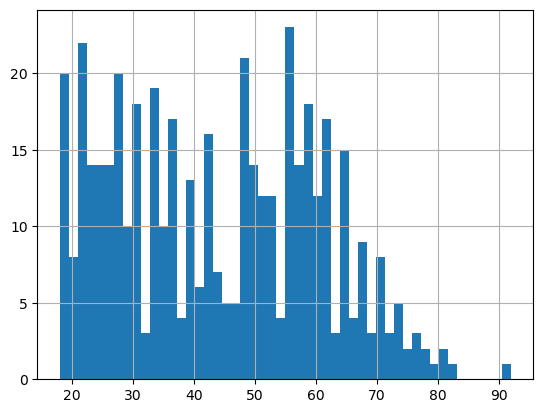

In [63]:
limited['Age'].hist(bins=50)

#### Problem 4.2 - Relating Demographics to Polling Results

Both Age and Info.On.Internet are variables that take on many values, so a good way to observe their relationship is through a graph. We learned in lecture that we can plot Age against Info.On.Internet with the command plot(limited$Age, limited$Info.On.Internet). However, because Info.On.Internet takes on a small number of values, multiple points can be plotted in exactly the same location on this graph.

What is the largest number of interviewees that have exactly the same value in their Age variable AND the same value in their Info.On.Internet variable? In other words, what is the largest number of overlapping points in the plot plot(limited$Age, limited$Info.On.Internet)? (HINT: Use the table function to compare the number of observations with different values of Age and Info.On.Internet.)

In [71]:
grouped = limited.groupby(['Age', 'Info.On.Internet']).size()

# Encontramos el valor máximo de conteo, que representa el mayor número de puntos superpuestos
max_overlapping = grouped.max()

In [72]:
max_overlapping

5

In [69]:
crosstabAgeInfoInternet = pd.crosstab( limited['Age'] , limited['Info.On.Internet'] )

In [73]:
crosstabAgeInfoInternet

Info.On.Internet,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Age,,,,,,,,,,,,
18.0,0,2,0,0,1,1,4,1,0,0,1,0
19.0,0,1,0,2,0,1,0,2,4,0,0,0
20.0,0,0,2,4,1,0,0,0,1,0,0,0
21.0,1,1,1,0,1,3,1,0,1,1,1,0
22.0,0,1,1,0,1,2,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
78.0,1,0,1,0,0,0,0,0,0,0,0,0
79.0,0,0,1,0,0,0,0,0,0,0,0,0
81.0,1,0,0,0,0,1,0,0,0,0,0,0


In [74]:
grouped

Age   Info.On.Internet
18.0  1.0                 2
      4.0                 1
      5.0                 1
      6.0                 4
      7.0                 1
                         ..
79.0  2.0                 1
81.0  0.0                 1
      5.0                 1
82.0  7.0                 1
92.0  0.0                 1
Length: 310, dtype: int64

#### Problem 4.3 - Relating Demographics to Polling Results

To avoid points covering each other up, we can use the jitter() function on the values we pass to the plot function. Experimenting with the command jitter(c(1, 2, 3)), what appears to be the functionality of the jitter command?

In [82]:
# Función para aplicar jitter
def add_jitter(values, width=0.1):
    return values + np.random.uniform(-width, width, size=values.shape)

limited['Age_jitter'] = add_jitter(limited['Age'], 0.1)

limited['Age_jitter'] 

C:\Users\USER\AppData\Local\Temp\ipykernel_15428\210620008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited['Age_jitter'] = add_jitter(limited['Age'], 0.1)


5       48.967283
11      50.078613
13      46.945175
20      56.078308
30      47.925287
          ...    
995     30.030264
996     28.967122
997     56.979108
999     21.945036
1001    25.960615
Name: Age_jitter, Length: 470, dtype: float64

In [83]:
limited['Info.On.Internet_jitter'] = add_jitter(limited['Info.On.Internet'], 0.1)


C:\Users\USER\AppData\Local\Temp\ipykernel_15428\129273813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited['Info.On.Internet_jitter'] = add_jitter(limited['Info.On.Internet'], 0.1)


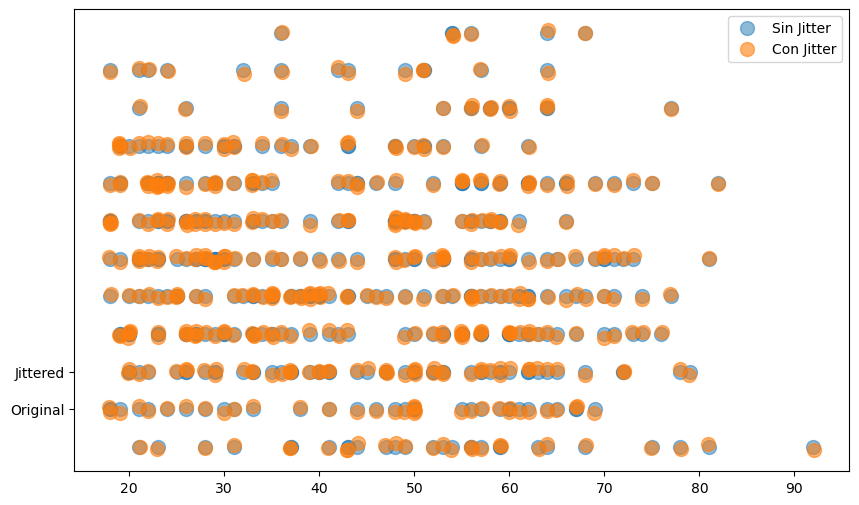

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(limited['Age'] , limited['Info.On.Internet'] , 'o', label='Sin Jitter', markersize=10, alpha=0.5)
plt.plot(limited['Age_jitter'], limited['Info.On.Internet_jitter'], 'o', label='Con Jitter', markersize=10, alpha=0.6)
plt.yticks([1, 2], ['Original', 'Jittered'])
plt.legend()
plt.show()

#### Problem 4.4 - Relating Demographics to Polling Results

Now, plot Age against Info.On.Internet with plot(jitter(limited$Age), jitter(limited$Info.On.Internet)). What relationship to you observe between Age and Info.On.Internet?

#### Problem 4.5 - Relating Demographics to Polling Results

Use the tapply() function to obtain the summary of the Info.On.Internet value, broken down by whether an interviewee is a smartphone user.

What is the average Info.On.Internet value for smartphone users?

In [90]:
poll.groupby('Smartphone')['Info.On.Internet'].mean()

Smartphone
0.0    2.922807
1.0    4.367556
Name: Info.On.Internet, dtype: float64

What is the average Info.On.Internet value for non-smartphone users?

In [91]:
poll.groupby('Smartphone')['Info.On.Internet'].mean()[0]

2.92280701754386

#### Problem 4.6 - Relating Demographics to Polling Results

Similarly use tapply to break down the Tried.Masking.Identity variable for smartphone and non-smartphone users.

What proportion of smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [94]:
crosstabSmartMask = pd.crosstab(poll.Smartphone, poll['Tried.Masking.Identity'])

In [95]:
crosstabSmartMask

Tried.Masking.Identity,0.0,1.0
Smartphone,,
0.0,248,33
1.0,390,93


In [96]:
crosstabSmartMask.div(crosstabSmartMask.sum(axis=1), axis=0)


Tried.Masking.Identity,0.0,1.0
Smartphone,,
0.0,0.882562,0.117438
1.0,0.807453,0.192547


What proportion of non-smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [98]:
crosstabSmartMask.div(crosstabSmartMask.sum(axis=1), axis=0).iloc[0,1]


0.11743772241992882

Next week, we will begin to more formally characterize how an outcome variable like Info.On.Internet can be predicted with a variable like Age or Smartphone.